<a href="https://colab.research.google.com/github/aaronyu888/mat-494-notebooks/blob/main/Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.4 Maximum Likelihood Estimation
Maximum likelihood estimation is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. 

Let $X_1, X_2,...,X_n$ have joint pmf or pdf $f(x_1,x_2,...,x_n;\theta_1,...,\theta_m)$ where the parameters $\theta_1,...,\theta_m$ have unknown values. When $x_1,x_2,...,x_n$ are the observed sample values then $f(x_1,x_2,...,x_n;\theta_1,...,\theta_m)$ is a function of $\theta_1,...,\theta_m$ and is called the likelihood function, which we want to maximize.

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
# import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


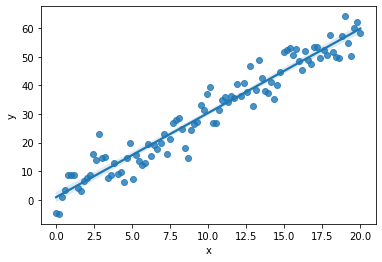

In [24]:
# normally distributed randomized data
n = 100
x = np.linspace(0, 20, n)
e = np.random.normal(loc = 0.0, scale = 5.0, size = n)
y = 3*x + e

df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

sns.regplot(df.x, df.y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
# OLS gives us a benchmark to compare MLE to
X = df[['constant', 'x']]
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1404.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           6.89e-60
Time:                        00:15:20   Log-Likelihood:                -293.19
No. Observations:                 100   AIC:                             590.4
Df Residuals:                      98   BIC:                             595.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.8772      0.910      0.964      0.338      -0.930       2.684
x              2.9465      0.079     37.465      0.000       2.790       3.103
==============================================================================
Omnibus:                        0.580   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.442
Skew:                           0.163   Prob(JB):                        0.802
Kurtosis:                       2.987   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# likelihood function
def MLERegression(params):
  intercept, beta, sd = params[0], params[1], params[2] # these are guesses at parameters
  yhat = intercept + beta*x # predicting ground truth function
  negLL = -np.sum(stats.norm.logpdf(y, loc = yhat, scale = sd))
  return negLL

In [27]:
guess = np.array([3, 3, 3])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp' : True})
results_df = pd.DataFrame({'coef':results['x']})
results_df.index = ['constant', 'x', 'sigma']
results_df.head(2)

Optimization terminated successfully.
         Current function value: 293.192617
         Iterations: 81
         Function evaluations: 146


,coef
constant,0.877168
x,2.946555


Our likelihood function gives pretty similar results to OLS.